# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import csv file
data= pd.read_csv('haberman.csv')

In [3]:
print('First five elements:\n',data.head(),'\n')

print('Features names: ', data.columns)
# to determine the feature and total no of data points in each coloumns
data.shape

First five elements:
    age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1 

Features names:  Index(['age', 'year', 'nodes', 'status'], dtype='object')


(306, 4)

In [4]:
# to get data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [5]:
# statistical description of data-set
data.describe()

"""
count: total no of data points in a feature
mean : an average value 
std  : standard deviation used to counter graphical or statisctical distribution
min  : minimum value
max  : maximum value
"""

'\ncount: total no of data points in a feature\nmean : an average value \nstd  : standard deviation used to counter graphical or statisctical distribution\nmin  : minimum value\nmax  : maximum value\n'

In [6]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

#### As the above output represents a significant no. of difference between each classes i.e survived or not survived, it shows that it is an imbalanced dataset

Where,
Class 1: Survived
Class 2: Not Survived


## Objective: To predict the status of cases  

### Univariate Analysis(pdf, cdf, boxplot and violin plot)

It is the simplest form of data analysis where uni refers to one and variate referes to variable.(One variable data analysis)

### PDF(Probability density function) 
In probability theory, a probability density function, or density of a continuous random variable, is a function whose value at any given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample

/home/kuldeep/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


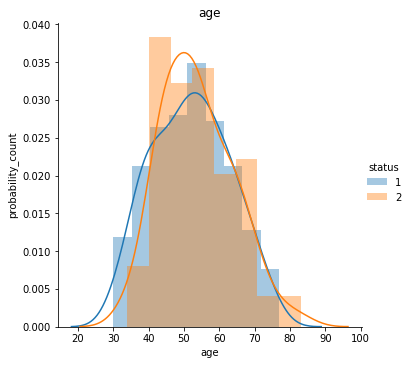

In [7]:
# using feature i.e. age to generate pdf

sns.FacetGrid(data, hue='status', height=5).map(sns.distplot, 'age').add_legend()
plt.title("age")
plt.ylabel('probability_count')
plt.show()

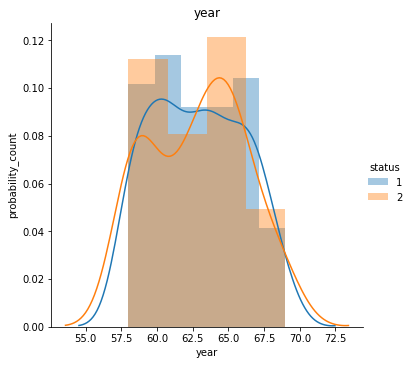

In [8]:
# using feature i.e. year to generate pdf

sns.FacetGrid(data, hue='status', height=5).map(sns.distplot, 'year').add_legend()
plt.title('year')
plt.ylabel('probability_count')
plt.show()

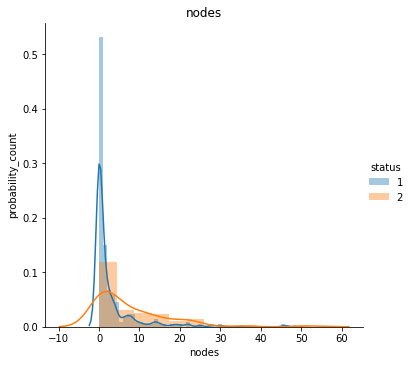

In [9]:
# using feature i.e. nodes to generate pdf

sns.FacetGrid(data, hue='status', height=5).map(sns.distplot, 'nodes').add_legend()
plt.title('nodes')
plt.ylabel('probability_count')
plt.show()

#### Observation:  All the features are overlapping each other. But in case of nodes, the status is bit differentiating as it is showing that about 12% of population denstity is of non survived case but approx. 55% is of survived case.

### CDF(Cummulative Distribution function)
In probability theory and statistics, the cumulative distribution function of a real-valued random variable, or just distribution function of, evaluated at, is the probability that will take a value less than or equal to.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


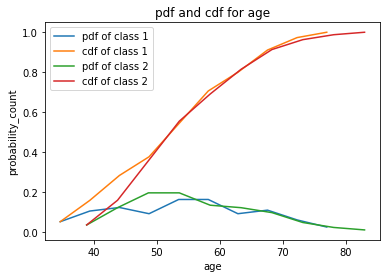

In [10]:
#Plot CDF of age

# convert the numeric values of feature i.e. status 
# class_1 for survived
class_1= data.loc[data['status']==1]
# class_2 for survived
class_2= data.loc[data['status']==2]

counts, bin_edges = np.histogram(class_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(class_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
plt.legend(label)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("probability_count")
plt.show();


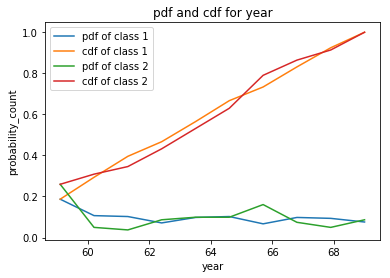

In [11]:
# year
counts, bin_edges = np.histogram(class_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(class_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
plt.legend(label)
plt.title("pdf and cdf for year")
plt.xlabel("year")
plt.ylabel("probability_count")
plt.show();


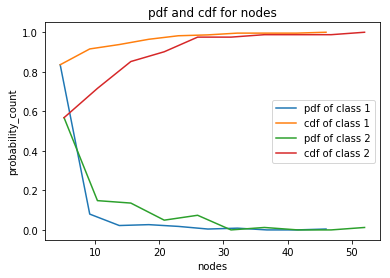

In [12]:
# nodes
counts, bin_edges = np.histogram(class_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(class_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
plt.legend(label)
plt.title("pdf and cdf for nodes")
plt.xlabel("nodes")
plt.ylabel("probability_count")
plt.show();

#### Observation:  
Nodes: Survived if having nodes less than 46 approx.

### Box-Plot 
A simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

In [13]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``

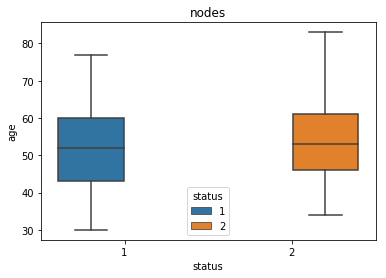

In [14]:
# box-plot using age
sns.boxplot(x='status',y='age', hue='status', data=data).set_title('nodes')
plt.show()

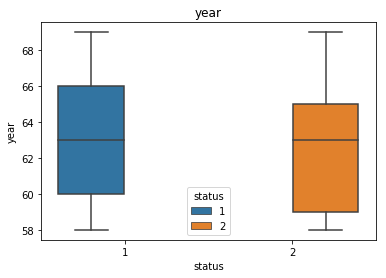

In [15]:
# box-plot using year
sns.boxplot(x='status', y='year', hue='status', data=data).set_title('year')
plt.show()

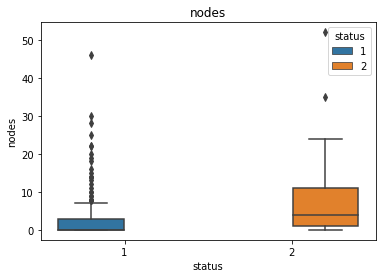

In [16]:
# box-plot using nodes
sns.boxplot(x='status', y='nodes', hue='status', data=data).set_title('nodes')
plt.show()

#### Observations:
Age:  Not quite differentiatable, as both survived and not survived cases are of same range in this case.
Year: 60 to 66(survived), 59 to 65(not survived), same as in case of age. 
Nodes: Quite differentiable.

### Violin Plot
A violin plot is a method of plotting numeric data. It is similar to a box plot with a rotated kernel density plot on each side. A violin plot has four layers. The outer shape represents all possible results, with thickness indicating how common. The next layer inside represents the values that occur 95% of the time.

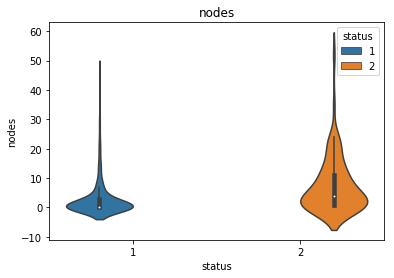

In [17]:
# evaluating it using feature i.e nodes
sns.violinplot(x='status', y='nodes', hue='status', data=data)
plt.title('nodes')
plt.show()

#### Observation:
Using univariate plots, the nodes is good feature for target prediction in this classification problem.

### Bivariate Analysis( Scatter plot, pair-plot)
As bi means two, it is used to analyse data set for obtaining best feature  using two variables

### Scatter Plot
A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.

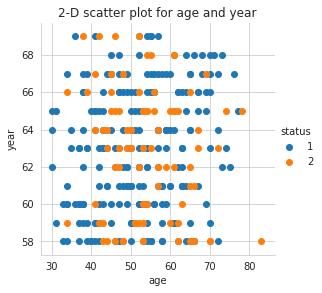

In [18]:
# age and year
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("2-D scatter plot for age and year")
plt.show();


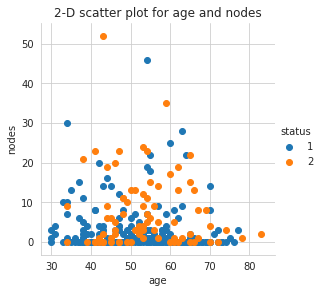

In [19]:
# age and node
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2-D scatter plot for age and nodes")
plt.show();


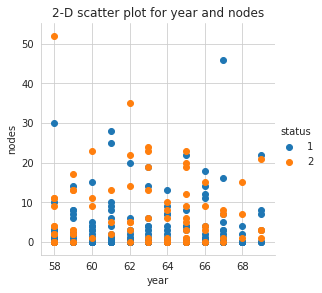

In [20]:
# year and node
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("2-D scatter plot for year and nodes")
plt.show();

#### Observation:  The relationship is not linearly separable 

### Pair-Plot
A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.

In [21]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.
    

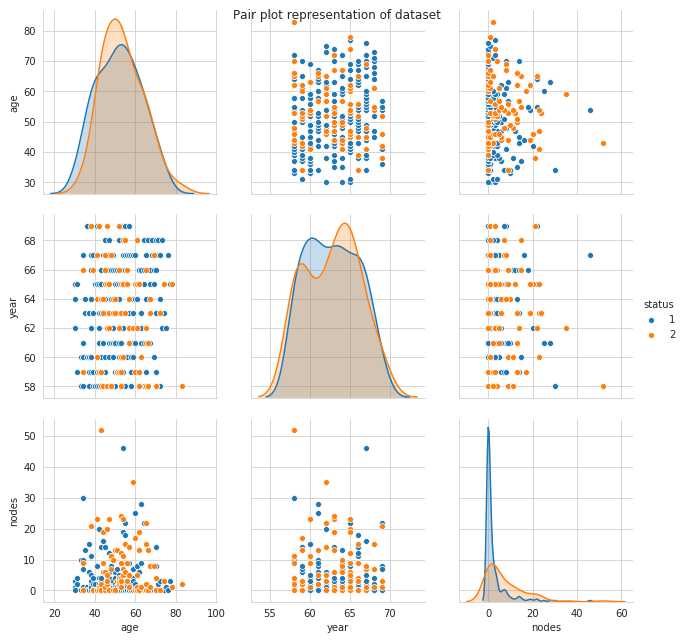

In [22]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", vars=['age','year','nodes'], height=3);
plt.suptitle("Pair plot representation of dataset")
plt.show()

#### Observation: As in this dataset, there is too much overlapping, so it is unable to identify most useful feature. 

### Conclusion: 
1. The dataset is imbalance i.e. approx. 73% survived and 26% not survived.
2. As the data points are not linearly separable as we have observed in scatter plots, so very difficult to identify most useful feature. Still, we can use nodes.
